In [1]:
from data_processing import fourFolds as ff

folds = ff()

In [2]:
import naive_bayes as nb 

In [3]:
from train_and_predict import train_and_predict_by_fold as tpbf

In [57]:
pred_by_fold0 = tpbf(folds, nb.trainModel, nb.predictions)

In [59]:
false_pred_by_fold = []
for i, pred in enumerate(pred_by_fold0):
    false_pred = []
    for j in range(len(pred)):
        if pred[j] != folds[i][3][j]:
            false_pred.append((j, pred[j], folds[i][3][j]))
    false_pred_by_fold.append(false_pred)

In [60]:
for false_pred in false_pred_by_fold:
    print(len(false_pred))

136
169
156
149


In [ ]:
print(len(folds[0][3]))
print(len(pred_by_fold[0]))

In [6]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
def plot_confusion_matrix(name, cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, rotation_mode='anchor', ha = 'right')
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#     plt.show()
    plt.savefig("confusion_matrix_for_" + name + ".png", bbox_inches = 'tight')
    
cnf_matrix = confusion_matrix(folds[2][3], pred_by_fold0[2])
plot_confusion_matrix("naive_bayes_fold_3", cnf_matrix, ['ham', 'spam'],
                      title='Confusion matrix, without normalization')

NameError: name 'pred_by_fold0' is not defined

In [4]:
import random_forest as rf

In [17]:
# 1000 1000 error rate: 0.09547738693467338
pred_by_fold1 = tpbf(folds, rf.train_model, rf.predictions, (2, 20, 10, 1000, 1000))

In [10]:
# 1000 2000 error rate: 0.09368269921033741
pred_by_fold2 = tpbf(folds, rf.train_model, rf.predictions, (2, 20, 10, 1000, 2000))

In [14]:
# 1000 3000 error rate: 0.08417085427135677
pred_by_fold3 = tpbf(folds, rf.train_model, rf.predictions, (2, 20, 10, 1000, 3000))

In [16]:
# 2000 1000 error rate: 0.0674802584350323
pred_by_fold4 = tpbf(folds, rf.train_model, rf.predictions, (2, 20, 10, 2000, 1000))

In [18]:
# 2000 2000 error rate: 0.06281407035175879
pred_by_fold5 = tpbf(folds, rf.train_model, rf.predictions, (2, 20, 10, 2000, 2000))

In [20]:
# 2000 3000 error rate: 0.05778894472361809
pred_by_fold6 = tpbf(folds, rf.train_model, rf.predictions, (2, 20, 10, 2000, 3000))

In [22]:
# 3000 1000 error rate: 0.05240488155061019
pred_by_fold7 = tpbf(folds, rf.train_model, rf.predictions, (2, 20, 10, 3000, 1000))

In [24]:
# 3000 2000 error rate: 0.04953338119167265
pred_by_fold8 = tpbf(folds, rf.train_model, rf.predictions, (2, 20, 10, 3000, 2000))

In [26]:
# 3000 3000 error rate: 0.04773869346733669
pred_by_fold9 = tpbf(folds, rf.train_model, rf.predictions, (2, 20, 10, 3000, 3000))

In [66]:
# 3000 1000 20 error rate: 0.05078966259870783
pred_by_fold10 = tpbf(folds, rf.train_model, rf.predictions, (2, 20, 20, 3000, 1000))

In [8]:
# 3000 1000 50 error rate: 0.04325197415649677
pred_by_fold11 = tpbf(folds, rf.train_model, rf.predictions, (2, 20, 50, 3000, 1000))

In [10]:
def evaluate4Fold(pred_by_fold, folds):
    false_pred_by_fold = []
    error_rate = 0.0
    for i, pred in enumerate(pred_by_fold):
        false_pred = []
        for j in range(len(pred)):
            if pred[j] != folds[i][3][j]:
                false_pred.append((j, pred[j], folds[i][3][j]))
        error_rate += float(len(false_pred))/len(pred)
        false_pred_by_fold.append(false_pred)
    error_rate = error_rate / 4.0
    return (error_rate, false_pred_by_fold)


In [12]:
(error_rate, errors) = evaluate4Fold(pred_by_fold1, folds)
print(error_rate)

0.09547738693467338


In [13]:
(error_rate, errors) = evaluate4Fold(pred_by_fold2, folds)
print(error_rate)

0.09368269921033741


In [15]:
(error_rate, errors) = evaluate4Fold(pred_by_fold3, folds)
print(error_rate)

0.08417085427135677


In [17]:
(error_rate, errors) = evaluate4Fold(pred_by_fold4, folds)
print(error_rate)

0.0674802584350323


In [19]:
(error_rate, errors) = evaluate4Fold(pred_by_fold5, folds)
print(error_rate)

0.06281407035175879


In [21]:
(error_rate, errors) = evaluate4Fold(pred_by_fold6, folds)
print(error_rate)

0.05778894472361809


In [23]:
(error_rate, errors) = evaluate4Fold(pred_by_fold7, folds)
print(error_rate)

0.05240488155061019


In [25]:
(error_rate, errors) = evaluate4Fold(pred_by_fold8, folds)
print(error_rate)

0.04953338119167265


In [27]:
(error_rate, errors) = evaluate4Fold(pred_by_fold9, folds)
print(error_rate)

0.04773869346733669


[[0.0954, 0.0936, 0.0841], [0.0674, 0.0628, 0.0577], [0.0524, 0.0495, 0.0477]]


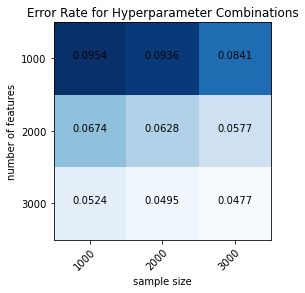

In [55]:

cm = [[0.0954, 0.0936, 0.0841], 
     [0.0674, 0.0628, 0.0577],
     [0.0524, 0.0495, 0.0477]]
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Error Rate for Hyperparameter Combinations")
# plt.colorbar()
classes = ['1000', '2000', '3000']
# plt.xticks(tick_marks, classes, rotation=45, rotation_mode='anchor', ha = 'right')
# plt.yticks(tick_marks, classes)


print(cm)
tick_marks = [0, 1, 2]
classes = ["1000", "2000", "3000"]
plt.xticks(tick_marks, classes, rotation=45, rotation_mode='anchor', ha = 'right')
plt.yticks(tick_marks, classes)

# thresh = cm.max() / 2.
for i, j in itertools.product(range(3), range(3)):
    plt.text(j, i, cm[i][j],
                horizontalalignment="center",
                color="black")# if cm[i][j] > 0.05 else "black")

plt.ylabel('number of features')
plt.xlabel('sample size')
#plt.show()
plt.savefig("error_rate.png", bbox_inches = 'tight')

In [67]:
(error_rate, errors) = evaluate4Fold(pred_by_fold10, folds)
print(error_rate)

0.05078966259870783


In [11]:
(error_rate, errors) = evaluate4Fold(pred_by_fold11, folds)
print(error_rate)

0.04289303661162958


[[0.524, 0.507, 0.433]]


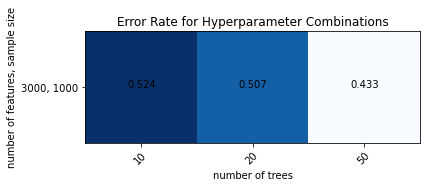

In [7]:
cm = [[0.524, 0.507, 0.433]]
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Error Rate for Hyperparameter Combinations")
# plt.colorbar()
classes = ['1000', '2000', '3000']
# plt.xticks(tick_marks, classes, rotation=45, rotation_mode='anchor', ha = 'right')
# plt.yticks(tick_marks, classes)


print(cm)
tick_marks = [0, 1, 2]
tree_size = ["10", "20", "50"]
plt.xticks(tick_marks, tree_size, rotation=45, rotation_mode='anchor', ha = 'right')
plt.yticks([0], ["3000, 1000"])

# thresh = cm.max() / 2.
for i, j in itertools.product([0], range(3)):
    plt.text(j, i, cm[i][j],
                horizontalalignment="center",
                color="black")# if cm[i][j] > 0.05 else "black")

plt.ylabel('number of features, sample size')
plt.xlabel('number of trees')
#plt.show()
plt.savefig("error_rate2.png", bbox_inches = 'tight')

Confusion matrix, without normalization
[[1211    0]
 [ 136   46]]


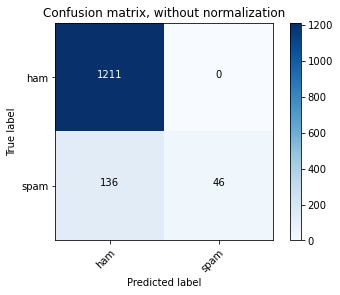

In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
def plot_confusion_matrix(name, cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, rotation_mode='anchor', ha = 'right')
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
#     plt.savefig("confusion_matrix_for_" + name + ".png", bbox_inches = 'tight')
    
cnf_matrix = confusion_matrix(folds[3][3], pred_by_fold1[3])
plot_confusion_matrix("random_forest_fold_4", cnf_matrix, ['ham', 'spam'],
                      title='Confusion matrix, without normalization')